### Importing Libraries

In [18]:
import numpy as np
import pandas as pd
from sklearn import model_selection

### Loading Data

In [26]:
df= pd.read_csv("Churn.csv")

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Wrangling

In [28]:
df.shape

(10000, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
df.duplicated().sum()

0

In [31]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [33]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [34]:
#Dropping irrelevant columns
df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first= True)

### Train Test Split

In [40]:
#Scaling and Normalization
from sklearn.model_selection import train_test_split
x= df.drop(columns= ['Exited'])
y= df['Exited']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.8, random_state=1)

In [41]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [42]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [43]:
x_train.shape

(2000, 11)

In [44]:
y_train.shape

(2000,)

### Data Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
x_train_scaled

array([[-0.17362694, -0.76292384, -1.01670365, ...,  1.76981112,
        -0.55964063, -1.10442556],
       [-1.03468131, -0.85619651,  0.36868712, ..., -0.56503205,
        -0.55964063,  0.90544807],
       [-0.49522556,  0.44962093,  1.75407788, ..., -0.56503205,
        -0.55964063,  0.90544807],
       ...,
       [ 0.26208731,  0.5428936 ,  1.40773019, ..., -0.56503205,
        -0.55964063, -1.10442556],
       [ 0.16871997, -0.01674245,  1.0613825 , ..., -0.56503205,
        -0.55964063, -1.10442556],
       [ 1.20613487,  0.26307558,  0.36868712, ...,  1.76981112,
        -0.55964063,  0.90544807]])

In [48]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Model Building

In [49]:
model = Sequential()
#1 input 1 hidden 1 output
#input layer
model.add(Dense(3, activation= 'sigmoid', input_dim=11))
#output layer
model.add(Dense(1, activation= 'sigmoid'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

### Model Training

In [63]:
history= model.fit(x_train_scaled, y_train, epochs= 10)

Epoch 1/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4523
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4496
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4471
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4447
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4426
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4406
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4389
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4372
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4356
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4342


In [55]:
model.layers[1].get_weights()

[array([[-1.081354  ],
        [-0.40517858],
        [-1.1052706 ]], dtype=float32),
 array([-0.10862152], dtype=float32)]

In [58]:
y_log= model.predict(x_test_scaled)

250/250 [==============================] - 1s 3ms/step


In [59]:
y_pred=np.where(y_log>0.5, 1,0)

In [60]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Model Evaluation

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred)

0.795125

In [64]:
import matplotlib.pyplot as plt

In [65]:
history.history

{'loss': [0.45230239629745483,
  0.449561208486557,
  0.447089284658432,
  0.44474461674690247,
  0.4426254332065582,
  0.4406282305717468,
  0.4389037489891052,
  0.4372134506702423,
  0.43562790751457214,
  0.4341758191585541]}

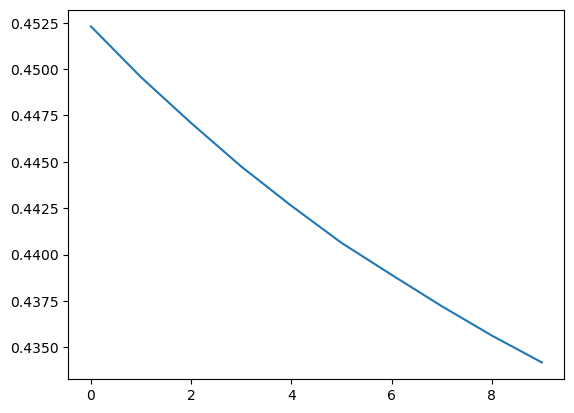

In [66]:
plt.plot(history.history['loss'])